# Project was peer-reviewed and validated by a Data Scientist.  

# Yelp training and twitter testing datasets are available in the repository.  

## Business objective of the project is to do sentiment analysis using twitter API and predict polarity of tweets on Donald Trump 

- Hypothesis – Tweets are likely to be more negative than positive because of the recent political affairs regarding North Korea and separation of families at the border. 

# 1. Import modules

In [98]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#pd.set_option('display.max_columns', 27)
#pd.set_option('display.max_columns', None) - For unlimited columns

# 2. Import consumer and access credentials – For this project text files were created and credentials were saved in those files. But a module also called package can be created, and the module can be imported just how pandas and numpy are imported in the above cell. These credentials have to be kept safe, but if these get shared accidentally, new credentials can be generated, which will replace the old credentials.

In [ ]:
CONSUMER_KEY = open("CONSUMER_KEY.txt", "r").read()
CONSUMER_SECRET = open("CONSUMER_SECRET.txt", "r").read()
ACCESS_TOKEN = open("ACCESS_TOKEN.txt", "r").read()
ACCESS_TOKEN_SECRET = open("ACCESS_TOKEN_SECRET.txt", "r").read()
#Raw NBConvert after streaming

# 3. Save tweets in a file - Tweets are streamed using a package called "tweepy". Search words are entered and then live tweets for that topic are streamed. Tweepy reads live tweets about the search words and saves them in a text file. Since these tweets are being collected live, if more people tweet about these words, then more tweets will be gathered in less time.
# To finish streaming, the session would have to be manually terminated and it will keep all the tweets saved which can be imported later, so tweets don’t have to be streamed each time.

In [ ]:
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import time

class savetweepyTweets(StreamListener):
    
    def on_data(self, data):
        
        try:
            print(type(data))
            print("New tweet")
            savefile = open("twitter.txt", "a")
            savefile.write(data)
            savefile.write("\n")
            savefile.close()
            return True
        except BaseException as e:
            print("Failed ", str(e))
            #self.disconnect()
            
    def on_error(self, status):
        print(status)
        #api.disconnect()  # added for extended tweet
        stream.disconnect() # -- Original

tl = savetweepyTweets()
au = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
au.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
stream = Stream(au, tl)  # original
#api = tweepy.API(au)     # added for extended tweet
#Raw NBConvert after streaming

In [ ]:
stream.filter(track=["Trump", "Donald Trump"], languages = ['en']) # -- Original

#api.search(q=["Anthony Bourdain", "Bourdain", "@Bourdain"], lang ="en", tweet_mode="extended") # added for extended tweet
#stream.Cursor(api.search,["to:Anthony Bourdain", "to:Bourdain"], tweet_mode="extended", languages = ['en'])
#Raw NBConvert after streaming

In [ ]:
stream.disconnect()       # added for extended tweet
#api.disconnect()  # original
#Raw NBConvert after streaming

# 4. JSON is used to read the saved file that were streamed and then those tweets are saved in a list.

In [99]:
import json

tweets_data = []
json_data = open("twitter_donald_trump.txt", "r")
for line in json_data:
    try:
        twe = json.loads(line)
        tweets_data.append(twe)
    except:
        continue

In [100]:
len(tweets_data)

2054

# Below is all the information that is received with one tweet.

In [101]:
tweets_data[0]

{'created_at': 'Fri Jun 15 23:43:00 +0000 2018',
 'id': 1007770481724805120,
 'id_str': '1007770481724805120',
 'text': '@existentialfish @KevinMKruse Especially trump and yet he is for some reason.',
 'display_text_range': [30, 77],
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'truncated': False,
 'in_reply_to_status_id': 1007651197816320000,
 'in_reply_to_status_id_str': '1007651197816320000',
 'in_reply_to_user_id': 17209415,
 'in_reply_to_user_id_str': '17209415',
 'in_reply_to_screen_name': 'existentialfish',
 'user': {'id': 350373053,
  'id_str': '350373053',
  'name': 'Hawkeye Jill',
  'screen_name': 'estepjill',
  'location': 'Phoenix, AZ',
  'url': None,
  'description': 'Retired insurance executive. Hoping to soon awake from this national nightmare.',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 510,
  'friends_count': 182,
  'listed_count': 2,
  'favourites_count': 62291,
  '

# 5. Above information is converted into a DataFrame because it is easy to analyze and manipulate information in a DataFrame format.

# Below is what the information will look like after turning it into a DataFrame. Information has been organized into columns.

In [102]:
tweet_df = pd.DataFrame(tweets_data)
tweet_df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,...,reply_count,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user,withheld_in_countries
0,NaN,None,Fri Jun 15 23:43:00 +0000 2018,"[30, 77]","{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0.0,False,low,...,0.0,0.0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",@existentialfish @KevinMKruse Especially trump...,1529106180970,False,"{'id': 350373053, 'id_str': '350373053', 'name...",NaN
1,NaN,None,Fri Jun 15 23:43:00 +0000 2018,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,{'full_text': '2 months ago Kathy Griffin was ...,0.0,False,low,...,0.0,0.0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",2 months ago Kathy Griffin was a pariah but no...,1529106180911,True,"{'id': 931103167, 'id_str': '931103167', 'name...",NaN
2,NaN,None,Fri Jun 15 23:43:00 +0000 2018,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0.0,False,low,...,0.0,0.0,False,{'created_at': 'Fri Jun 15 01:53:07 +0000 2018...,"<a href=""http://twitter.com/download/iphone"" r...",RT @prernaplal: The 1997 Flores Agreement that...,1529106180923,False,"{'id': 803074388031631360, 'id_str': '80307438...",NaN
3,NaN,None,Fri Jun 15 23:43:00 +0000 2018,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0.0,False,low,...,0.0,0.0,False,{'created_at': 'Fri Jun 15 17:53:31 +0000 2018...,"<a href=""http://twitter.com/download/android"" ...",RT @SethAbramson: TRUMP-RUSSIA UPDATE\n\nFlynn...,1529106180905,False,"{'id': 879049928508674050, 'id_str': '87904992...",NaN
4,NaN,None,Fri Jun 15 23:43:00 +0000 2018,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0.0,False,low,...,0.0,0.0,False,{'created_at': 'Fri Jun 15 22:02:11 +0000 2018...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @NetworksManager: Don't let Paul Manafort r...,1529106180906,False,"{'id': 1563908942, 'id_str': '1563908942', 'na...",NaN


In [103]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 38 columns):
contributors                 0 non-null float64
coordinates                  1 non-null object
created_at                   1950 non-null object
display_text_range           396 non-null object
entities                     1950 non-null object
extended_entities            64 non-null object
extended_tweet               209 non-null object
favorite_count               1950 non-null float64
favorited                    1950 non-null object
filter_level                 1950 non-null object
geo                          1 non-null object
id                           1950 non-null float64
id_str                       1950 non-null object
in_reply_to_screen_name      308 non-null object
in_reply_to_status_id        284 non-null float64
in_reply_to_status_id_str    284 non-null object
in_reply_to_user_id          308 non-null float64
in_reply_to_user_id_str      308 non-null object
is_quo

In [104]:
#pd.set_option("display.max_colwidth", 0)
tweet_df[['created_at', 'text']].head()

,created_at,text
0,Fri Jun 15 23:43:00 +0000 2018,@existentialfish @KevinMKruse Especially trump...
1,Fri Jun 15 23:43:00 +0000 2018,2 months ago Kathy Griffin was a pariah but no...
2,Fri Jun 15 23:43:00 +0000 2018,RT @prernaplal: The 1997 Flores Agreement that...
3,Fri Jun 15 23:43:00 +0000 2018,RT @SethAbramson: TRUMP-RUSSIA UPDATE\n\nFlynn...
4,Fri Jun 15 23:43:00 +0000 2018,RT @NetworksManager: Don't let Paul Manafort r...


# 6. Optional – User information – Tweets were stored in a DataFrame format, but each user's information in the DataFrame is still stored as a dictionary.  

# Below is what this information looks like for each user. And these features are also stored in the form of dictionary within the DataFrame.

In [105]:
tweet_df.user[0]

{'id': 350373053,
 'id_str': '350373053',
 'name': 'Hawkeye Jill',
 'screen_name': 'estepjill',
 'location': 'Phoenix, AZ',
 'url': None,
 'description': 'Retired insurance executive. Hoping to soon awake from this national nightmare.',
 'translator_type': 'none',
 'protected': False,
 'verified': False,
 'followers_count': 510,
 'friends_count': 182,
 'listed_count': 2,
 'favourites_count': 62291,
 'statuses_count': 38712,
 'created_at': 'Sun Aug 07 17:26:42 +0000 2011',
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': False,
 'lang': 'en',
 'contributors_enabled': False,
 'is_translator': False,
 'profile_background_color': 'C0DEED',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_tile': False,
 'profile_link_color': '1DA1F2',
 'profile_sidebar_border_color': 'C0DEED',
 'profile_sidebar_fill_color': 'DDEEF6',
 'profile_text_colo

# The above user information that is stored in the dictionary format is converted into DataFrame, so information is more organized and easier to access.

# User information is converted into DataFrame below.

In [106]:
#pd.DataFrame([d['user'] for d in tweets_data]) -- didnt work
tweet_user = pd.DataFrame([d.get('user',{}) for d in tweets_data])
tweet_user.head()

,contributors_enabled,created_at,default_profile,default_profile_image,description,favourites_count,follow_request_sent,followers_count,following,friends_count,...,profile_text_color,profile_use_background_image,protected,screen_name,statuses_count,time_zone,translator_type,url,utc_offset,verified
0,False,Sun Aug 07 17:26:42 +0000 2011,True,False,Retired insurance executive. Hoping to soon aw...,62291.0,NaN,510.0,NaN,182.0,...,333333,True,False,estepjill,38712.0,NaN,none,None,NaN,False
1,False,Wed Nov 07 03:08:37 +0000 2012,True,False,American and proud of it. Old enough to have l...,32666.0,NaN,1249.0,NaN,1214.0,...,333333,True,False,MissBartmirth,35690.0,NaN,none,None,NaN,False
2,False,Mon Nov 28 03:13:49 +0000 2016,True,False,"Designer, Photographer, Naturalist, Citizen Sc...",44821.0,NaN,78.0,NaN,131.0,...,333333,True,False,SNFinVA,18511.0,NaN,none,None,NaN,False
3,False,Sun Jun 25 18:53:29 +0000 2017,True,False,Let's have some fun.\nI'll do anything for any...,1438.0,NaN,152.0,NaN,550.0,...,333333,True,False,WilliamScottDe3,4970.0,NaN,none,http://advlawnsurgeons.com,NaN,False
4,False,Tue Jul 02 19:12:31 +0000 2013,False,False,"Husband, Father, Grandfather, American Patri...",7167.0,NaN,3119.0,NaN,3337.0,...,3C3940,True,False,Tare1935,41375.0,NaN,none,None,NaN,False


In [107]:
tweet_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 39 columns):
contributors_enabled                  1950 non-null object
created_at                            1950 non-null object
default_profile                       1950 non-null object
default_profile_image                 1950 non-null object
description                           1543 non-null object
favourites_count                      1950 non-null float64
follow_request_sent                   0 non-null float64
followers_count                       1950 non-null float64
following                             0 non-null float64
friends_count                         1950 non-null float64
geo_enabled                           1950 non-null object
id                                    1950 non-null float64
id_str                                1950 non-null object
is_translator                         1950 non-null object
lang                                  1950 non-null object
listed_c

# 7. Optional - Original DataFrame that has all the information about tweets and user information are in two different dataframes, so those two DataFrames are merged into one DataFrame, so all the information is accessible at one place.

In [108]:
df = tweet_df.merge(tweet_user, left_index = True, right_index = True)
df.head()

,contributors,coordinates,created_at_x,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,...,profile_text_color,profile_use_background_image,protected,screen_name,statuses_count,time_zone,translator_type,url,utc_offset,verified
0,NaN,None,Fri Jun 15 23:43:00 +0000 2018,"[30, 77]","{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0.0,False,low,...,333333,True,False,estepjill,38712.0,NaN,none,None,NaN,False
1,NaN,None,Fri Jun 15 23:43:00 +0000 2018,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,{'full_text': '2 months ago Kathy Griffin was ...,0.0,False,low,...,333333,True,False,MissBartmirth,35690.0,NaN,none,None,NaN,False
2,NaN,None,Fri Jun 15 23:43:00 +0000 2018,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0.0,False,low,...,333333,True,False,SNFinVA,18511.0,NaN,none,None,NaN,False
3,NaN,None,Fri Jun 15 23:43:00 +0000 2018,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0.0,False,low,...,333333,True,False,WilliamScottDe3,4970.0,NaN,none,http://advlawnsurgeons.com,NaN,False
4,NaN,None,Fri Jun 15 23:43:00 +0000 2018,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0.0,False,low,...,3C3940,True,False,Tare1935,41375.0,NaN,none,None,NaN,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 77 columns):
contributors                          0 non-null float64
coordinates                           1 non-null object
created_at_x                          1950 non-null object
display_text_range                    396 non-null object
entities                              1950 non-null object
extended_entities                     64 non-null object
extended_tweet                        209 non-null object
favorite_count                        1950 non-null float64
favorited                             1950 non-null object
filter_level                          1950 non-null object
geo                                   1 non-null object
id_x                                  1950 non-null float64
id_str_x                              1950 non-null object
in_reply_to_screen_name               308 non-null object
in_reply_to_status_id                 284 non-null float64
in_reply_to_status_

In [13]:
#pd.set_option('display.max_columns', None)
df.head()

,contributors,coordinates,created_at_x,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,...,profile_text_color,profile_use_background_image,protected,screen_name,statuses_count,time_zone,translator_type,url,utc_offset,verified
0,NaN,None,Fri Jun 15 23:43:00 +0000 2018,"[30, 77]","{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0.0,False,low,...,333333,True,False,estepjill,38712.0,NaN,none,None,NaN,False
1,NaN,None,Fri Jun 15 23:43:00 +0000 2018,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,{'full_text': '2 months ago Kathy Griffin was ...,0.0,False,low,...,333333,True,False,MissBartmirth,35690.0,NaN,none,None,NaN,False
2,NaN,None,Fri Jun 15 23:43:00 +0000 2018,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0.0,False,low,...,333333,True,False,SNFinVA,18511.0,NaN,none,None,NaN,False
3,NaN,None,Fri Jun 15 23:43:00 +0000 2018,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0.0,False,low,...,333333,True,False,WilliamScottDe3,4970.0,NaN,none,http://advlawnsurgeons.com,NaN,False
4,NaN,None,Fri Jun 15 23:43:00 +0000 2018,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0.0,False,low,...,3C3940,True,False,Tare1935,41375.0,NaN,none,None,NaN,False


In [14]:
df.retweeted_status.head()

0                                                  NaN
1                                                  NaN
2    {'created_at': 'Fri Jun 15 01:53:07 +0000 2018...
3    {'created_at': 'Fri Jun 15 17:53:31 +0000 2018...
4    {'created_at': 'Fri Jun 15 22:02:11 +0000 2018...
Name: retweeted_status, dtype: object

# Plot below can be made better by consolidating duplicate locations into one. For instance, Los Angeles, shows up twice because one has CA in it and the other one does not. But the focus of this project is not to consolidate duplicate locations because that would have to be a separate project. There are more locations, but only top 30 locations are being shown.
# The plot shows which locations are talking the most or tweeting the most about Donald Trump. Based on the below plot, most people are talking about Donald Trump in the US and after that Canada is the second country that is tweeting the most about Donald Trump.


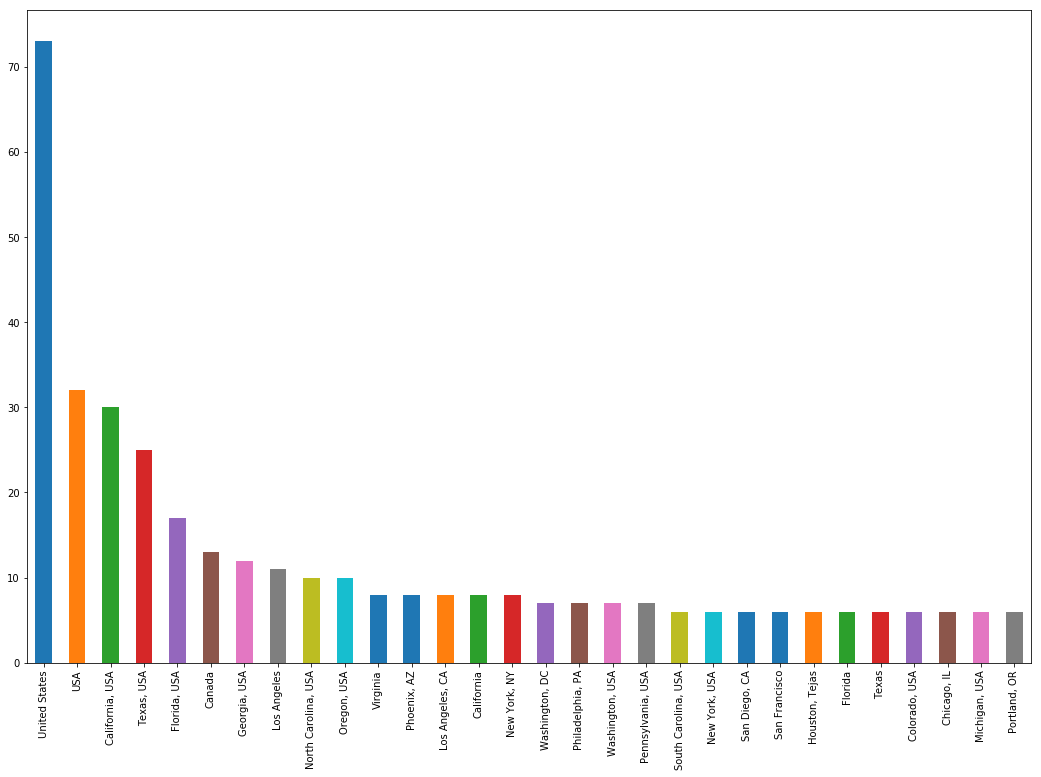

In [15]:
df.location.value_counts().head(30).plot(kind='bar', figsize = (18,12))

# Below plot shows different applications that were used to send tweets. And depending on the device that is being used, it can be determined what smart phone devices are used the most. "Twitter for iPhone" and "Twitter for Android" are the top two applications that appear which tells that Apple's iPhone and different Android devices were used to send these tweets. 

# There are more unique applications that were used to send tweets, but only top 10 applications are being shown.

In [16]:
df.source.fillna(">NA</a>", inplace = True)

In [17]:
df['source'] = list(map(lambda a: a.split(">")[1][:-3], df['source']))

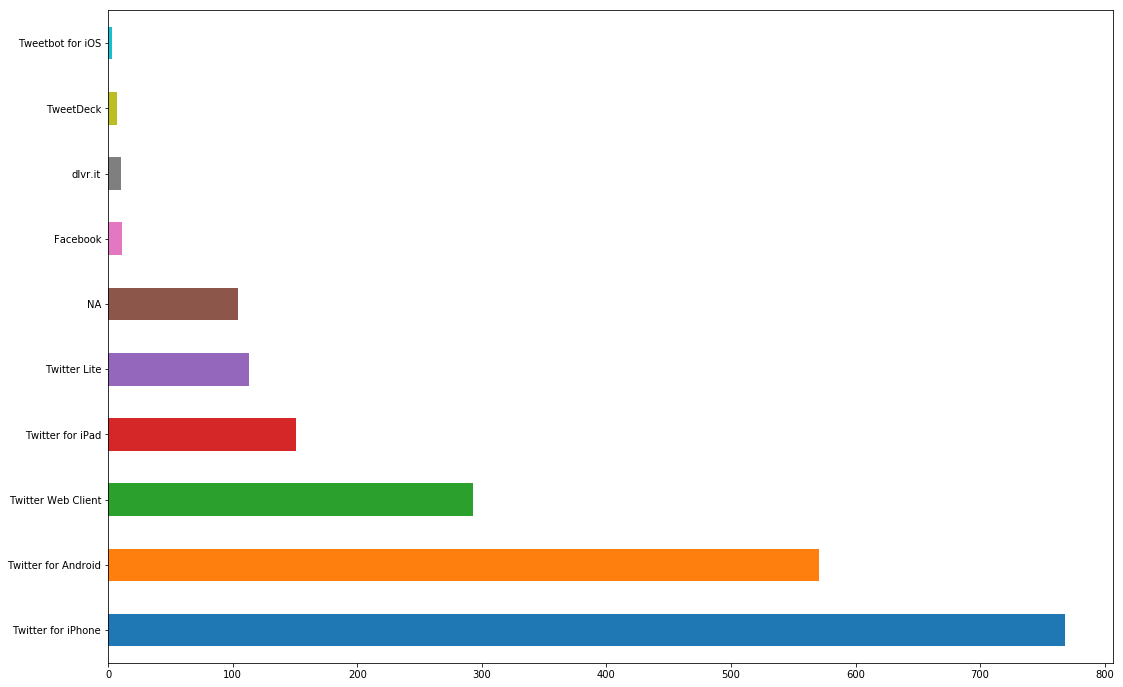

In [18]:
df.source.value_counts().head(10).plot(kind='barh', figsize = (18,12)) # horizontal
#df.source.value_counts().plot(kind='bar', figsize = (60,40)) # vertical

# 9 - Getting full text for tweets. Tweet that is in text column is truncated.

In [19]:
df.text[12]

"@SenWarren @realDonaldTrump They are the barbaric ones for exposing their children to this. This many people aren't… https://t.co/UEmhUz0oH2"

# The above shows how the text of the tweet is cut off. 

# Below shows the full text of the tweet.

In [20]:
df.extended_tweet[12]

{'full_text': "@SenWarren @realDonaldTrump They are the barbaric ones for exposing their children to this. This many people aren't fleeing domestic abuse. We can't let them break our laws. This is the best way to enforce them. At least we are taking care of them.",
 'display_text_range': [28, 248],
 'entities': {'hashtags': [],
  'urls': [],
  'user_mentions': [{'screen_name': 'SenWarren',
    'name': 'Elizabeth Warren',
    'id': 970207298,
    'id_str': '970207298',
    'indices': [0, 10]},
   {'screen_name': 'realDonaldTrump',
    'name': 'Donald J. Trump',
    'id': 25073877,
    'id_str': '25073877',
    'indices': [11, 27]}],
  'symbols': []}}

# Above full text of the tweet is in the form of dictionary, so "full_text" will be extracted from it because rest of the information fields are not necessary, but missing values will have to be dropped first from "extended_tweet".
# Back in September 2017, twitter extended the range from 140 to 280 characters, which is why there is a new feature called "extended_tweets" which also has "full_text", and that is where the full tweets are.

### Drop missing values

In [21]:
df.extended_tweet.isnull().sum()[df.extended_tweet.isnull().sum()>0]

array([1845], dtype=int64)

In [22]:
# dropping missing values from extended_tweets and reseting index
df.dropna(subset=['extended_tweet'], inplace = True)
df = df.reset_index(drop = True) # reset index
df.head()

,contributors,coordinates,created_at_x,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,...,profile_text_color,profile_use_background_image,protected,screen_name,statuses_count,time_zone,translator_type,url,utc_offset,verified
0,NaN,None,Fri Jun 15 23:43:00 +0000 2018,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,{'full_text': '2 months ago Kathy Griffin was ...,0.0,False,low,...,333333,True,False,MissBartmirth,35690.0,NaN,none,None,NaN,False
1,NaN,None,Fri Jun 15 23:43:01 +0000 2018,"[28, 140]","{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,{'full_text': '@SenWarren @realDonaldTrump The...,0.0,False,low,...,333333,True,False,realist_of,14.0,NaN,none,https://www.binance.com/?ref=15212816,NaN,False
2,NaN,None,Fri Jun 15 23:43:01 +0000 2018,"[0, 140]","{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,"{'full_text': 'If we had any balls, and weren'...",0.0,False,low,...,333333,True,False,WeAreAllEarth,55974.0,NaN,none,None,NaN,False
3,NaN,None,Fri Jun 15 23:43:00 +0000 2018,"[0, 140]","{'hashtags': [{'text': 'maga', 'indices': [31,...",NaN,{'full_text': 'Manaforts daughter’s comments ...,0.0,False,low,...,333333,True,False,eastwardenigma,9.0,NaN,none,None,NaN,False
4,NaN,None,Fri Jun 15 23:43:02 +0000 2018,"[0, 140]","{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,{'full_text': '@GOP Trump is playing all of yo...,0.0,False,low,...,000000,False,False,FredraKodama,22238.0,NaN,none,http://www.myspace.com/fredrakodama,NaN,False


# Missing values have been dropped and full tweet can be extracted from "extended_tweet"

In [23]:
all_tweets = []
for a in range (len(df.extended_tweet)):
    single_tweet = (df['extended_tweet'][a]['full_text'])
    all_tweets.append(single_tweet)

In [24]:
df.text[11]

'@realDonaldTrump @POTUS ask manafort what it’s like to be in jail for Father’s Day and everyday after. \nThe childre… https://t.co/vw6rOcCDDc'

# Above shows the truncated and cut off tweet. 

# Tweets that were extracted from "extended_tweet" are saved over this column and shows the full text now.

In [25]:
df.text[:] = all_tweets
df.text[11]

C:\Users\maniq\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


'@realDonaldTrump @POTUS ask manafort what it’s like to be in jail for Father’s Day and everyday after. \nThe children taken from their parents did not commit a crime any crime worthy of horrible treatment you are inflicting'

# New DataFrame is created, which will only have full text/ tweet in it that was just extracted from "extended_tweet"

In [26]:
# choose a column that has null values, so we can use that as 1 or 0, positive or negative tweet
#new_data = df[['contributors', 'text']] 

new_data = df[['text']]
new_data.text[0]

'2 months ago Kathy Griffin was a pariah but now she’s harassing Kevin Hart for not trashing Trump in his shows. Did I miss something that has elevated her to some kind of champion of the left (I.e., bully).'

# 10. Train the model on labelled dataset. Yelp food reviews are used to train the model. Because the reviews are labelled with ratings from users.  

# Another way would be to create a labelled dataset, by reading the tweet and giving it a rating or polarity. 0 can be a negative tweet and 1 can be a positive tweet. And this method can be used to label 25 negative tweets and 25 positive tweets to train the model, then 50 tweets can be predicted based on that model and prediction of those 50 tweets can also be used to train the second model which would have 100 labelled tweets, to predict the next 100 tweets and this process will continue until all the tweets have been labelled and predicted, this is a form of reinforcement learning, but at an introductory level. But for this project prelabelled yelp reviews data set will be used to train the model.

In [27]:
yelp = pd.read_csv("yelp.csv")
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,1/26/2011,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,7/27/2011,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,6/14/2012,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,5/27/2010,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,1/5/2012,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


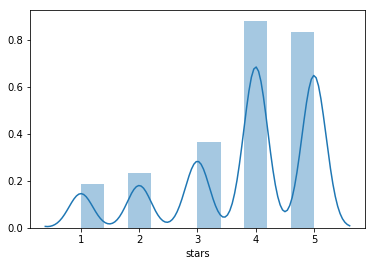

In [28]:
sns.distplot(yelp.stars, bins = 10)

# Above is the distribution of ratings.

# 11. Filter 1 and 5-star reviews – Reviews are filtered to only keep 1 and 5-star reviews, so the polarity can have two categories, 1 being negative and 5 being positive.  

# More categories can be created to split the polarity, 1 being extremely negative, 2 being less negative, 3 being neutral, 4 being slightly positive, and 5 being strongly positive. 

# But for this project only two categories are created.

In [29]:
new_yelp = yelp[(yelp.stars == 5)|(yelp.stars == 1)]
new_yelp.reset_index(drop = True, inplace = True) # if drop = True is not there, there will be two indexes

In [30]:
new_yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,1/26/2011,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,7/27/2011,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,_1QQZuf4zZOyFCvXc0o6Vg,5/27/2010,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
3,6ozycU1RpktNG2-1BroVtw,1/5/2012,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
4,zp713qNhx8d9KCJJnrw1xA,2/12/2010,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4


# Below histogram shows that there are more positive yelp reviews, 7 times as many compared to negative reviews. This is an example of imbalanced dataset. The dataset will have to be balanced by using one of the sampling techniques before it can be trained so the model is not bias to predict positive polarity more often. 

 # Two other ways would be either label a dataset with 50% positive and 50% negative tweets, or get a labelled data set that has 50% positive and 50% negative reviews, and then sampling won't be applied because the dataset will already be balanced.

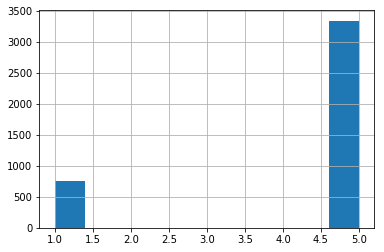

In [31]:
new_yelp.stars.hist()

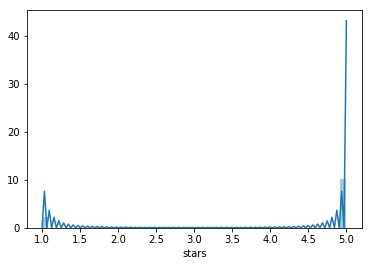

In [32]:
sns.distplot(new_yelp.stars)

# 12. Create a model - Assign x and y

In [33]:
x = new_yelp.text
y = new_yelp.stars

In [34]:
x.head()

0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
2    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
3    General Manager Scott Petello is a good egg!!!...
4    Drop what you're doing and drive here. After I...
Name: text, dtype: object

# 13 - Remove stopwords

In [35]:
x[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

# Above is a snippet of one of the full yelp reviews. This text will be used to train the model. But some of the most common words will be removed from the text for all the reviews because these common words help for conversational purpose, but these common words don’t help in analyzing polarity because these common words will be common in positive and negative reviews and tweets. Removing these common words saves resources and trains the model faster.

In [36]:
from nltk.corpus import stopwords
x = list(map(lambda a: a.lower().split(), x)) # change all uppercase words or titles to lower cases and split them at space
stop_words = set(stopwords.words('english'))  # find all stop words and make them equal to stop_words
x = list(map(lambda a: [item for item in a if item not in stop_words], x)) # only save words that are not stopwords
x = list(map(lambda a: " ".join(a), x)) # join back all the words that were seperated by commas

# After applying stop words that removes common English words from all the reviews, below is what the review will look like. "My" and "me here on my" was removed from the first sentence. This process has been done for all of the reviews.

In [37]:
x[0]

'wife took birthday breakfast excellent. weather perfect made sitting outside overlooking grounds absolute pleasure. waitress excellent food arrived quickly semi-busy saturday morning. looked like place fills pretty quickly earlier get better. favor get bloody mary. phenomenal simply best i\'ve ever had. i\'m pretty sure use ingredients garden blend fresh order it. amazing. everything menu looks excellent, white truffle scrambled eggs vegetable skillet tasty delicious. came 2 pieces griddled bread amazing absolutely made meal complete. best "toast" i\'ve ever had. anyway, can\'t wait go back!'

# 14 Train Test Split

In [38]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2, random_state = 0) # we dont have to stratify

# 15 CountVectorizer - In order to train the model, these reviews have to be converted into numbers because machine learning algorithms can't read text, but they can read numbers. However, dummies are not created for this. Dummies are created for fewer letters or text which are categories. But reviews have more text. For instance, the first yelp review has 84 words, so Countvectorizer will count the number of times words appear in the data.

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(lowercase = False, ngram_range = (1, 2))
x_train_dtm = vect.fit_transform(x_train) #dtm stands for document term matrix
x_test_dtm = vect.transform(x_test)

In [40]:
x_test_dtm

<818x177744 sparse matrix of type '<class 'numpy.int64'>'
	with 57764 stored elements in Compressed Sparse Row format>

In [41]:
x_train_dtm

<3268x177744 sparse matrix of type '<class 'numpy.int64'>'
	with 385915 stored elements in Compressed Sparse Row format>

In [42]:
x_test_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [43]:
print(x_train_dtm.shape)
print(y_train.shape)

(3268, 177744)
(3268,)


In [96]:
#x_test_dtm.toarray()[:,0]

In [97]:
#vect.get_feature_names()

In [46]:
vect.inverse_transform(x_test_dtm.toarray()[1])

[array(['another', 'another excellent', 'chicken', 'excellent',
        'extremely', 'find', 'find scottsdale', 'flavorful', 'food',
        'food extremely', 'good', 'good size', 'herb', 'herb chicken',
        'highly', 'highly recommended', 'portions', 'recommended',
        'scallops', 'scottsdale', 'scottsdale service', 'sea',
        'sea scallops', 'service', 'service wonderful', 'size',
        'size portions', 'wonderful', 'wonderful food'], dtype='<U45')]

In [47]:
x_test[1]

'another excellent find scottsdale. service wonderful food extremely flavorful good size portions. sea scallops herb chicken highly recommended.'

# 16 TF-IDF - Term frequency inverse document frequency – TFIDF is used to reduce the weightage of more common words. But stop words have already been removed by using stopwords from nltk corpus. If stopwords isnt applied, tfidf can be used to reduce weightage of common words.

In [48]:
#from sklearn.feature_extraction.text import TfidfTransformer
#tfidf_transformer = TfidfTransformer()
#x_train_tfidf = tfidf_transformer.fit_transform(x_train_dtm)
#x_test_tfidf =  tfidf_transformer.transform(x_test_dtm)

# 17 Random OverSampling

# There are numerous sampling techniques that can be used to balance imbalanced dataset. For this project SMOTE (Synthetic Minority Over-sampling Technique) will be used. SMOTE increases the representation of the minority class by creating new synthetic data points, so each class has equal representation.

# Below project discusses and explains in detail what each sampling technique is, how data points are created or removed and compares results of different sampling techniques: 
### [Random Under-sampling](https://github.com/mohammadbutt/5th-Project-Predicting-Device-Failure-Imbalanced-Data/blob/master/Predicting%20Device%20Failure-Random%20Under%20Sampling.ipynb)
### [Random Over-sampling](https://github.com/mohammadbutt/5th-Project-Predicting-Device-Failure-Imbalanced-Data/blob/master/Predicting%20Device%20Failure-Random%20Over%20Sampling.ipynb)
### [SMOTE (Synthetic Minority Over-sampling Technique)](https://github.com/mohammadbutt/5th-Project-Predicting-Device-Failure-Imbalanced-Data/blob/master/Predicting%20Device%20Failure-SMOTE.ipynb)
### [ADASYN (Adaptive Synthetic Sampling Approach for Imbalanced Learning)](https://github.com/mohammadbutt/5th-Project-Predicting-Device-Failure-Imbalanced-Data/blob/master/Predicting%20Device%20Failure-ADASYN.ipynb)


In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
smt = SMOTE(random_state = 0)
x_resampled_train, y_resampled_train = smt.fit_sample(x_train_dtm, y_train)

In [51]:
print(y_train[y_train ==1].count())
print(y_train[y_train ==5].count())

604
2664


In [52]:
print((y_resampled_train ==1).sum())
print((y_resampled_train ==5).sum())

2664
2664


# Scatter plot using PCA (Principal Component Analysis) - PCA performs dimensionality reduction on the data. It compresses the data which takes less memory, space, and is faster to train a machine learning algorithm. Turning text into numbers using countVectorizer created more features and applying principal component analysis onto it compressed that data. 

# In order to generate visualization of the text data, principal component analysis was used to turn 3,268-Dimensional data into 2-Dimensional data reducing computation time, power, and memory space.

In [53]:
from sklearn.decomposition import PCA
#from sklearn.pipeline import Pipeline

In [54]:
%%time
pca_x_train_dtm = PCA().fit(x_train_dtm.todense())
pca_x_res_train = PCA().fit(x_resampled_train.todense())

Wall time: 14min 4s


# Above shows principal component analysis that was performed on the training and oversampled training dataset that has 3,268 Dimensions which took 14 minutes and used a lot of memory to save this information. If visualizations are generated using all this information it will take a lot of time and resources.

# Below shows principal component analysis that was performed on the same two datasets. The data was reduced from 3,268 Dimensions to 2-Dimensions, which took 1 minute and 18 seconds and used very little memory.

In [55]:
%%time
pca_x_train_dtm = PCA(n_components=2).fit(x_train_dtm.todense())
pca_x_res_train = PCA(n_components=2).fit(x_resampled_train.todense())

Wall time: 1min 18s


In [56]:
new_x = pca_x_train_dtm.transform(x_train_dtm.todense())
res_x = pca_x_res_train.transform(x_resampled_train.todense())

In [57]:
x_1 = new_x[y_train==1]
x_5 = new_x[y_train==5]
x_1_res = res_x[y_resampled_train == 1]
x_5_res = res_x[y_resampled_train == 5]

# SMOTE is used to create more data points for negative reviews that are red dots. Plot 1 shows data points before oversampling is done on negative reviews. Plot 2 shows data points after oversampling is done on negative reviews. 

# In plot 1 there are few red data points and they are also light in color, in plot 2 there are more red data points as well as dark in color. Lighter red dots mean there are few data points and darker red dots mean there are more data points and negative reviews.

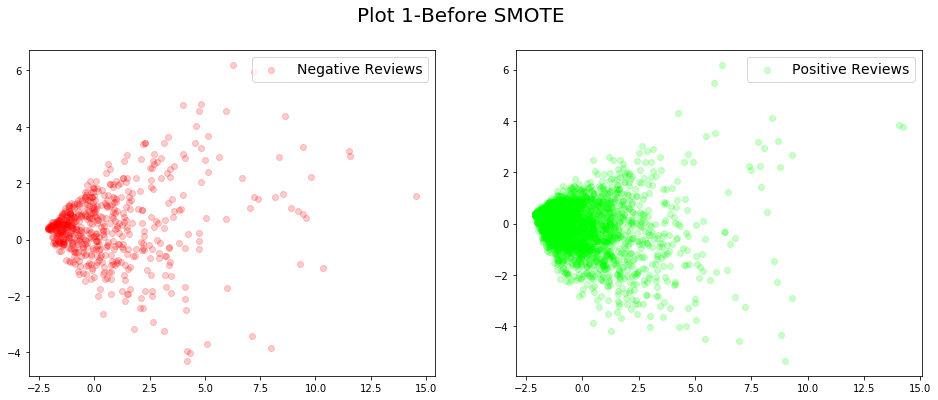

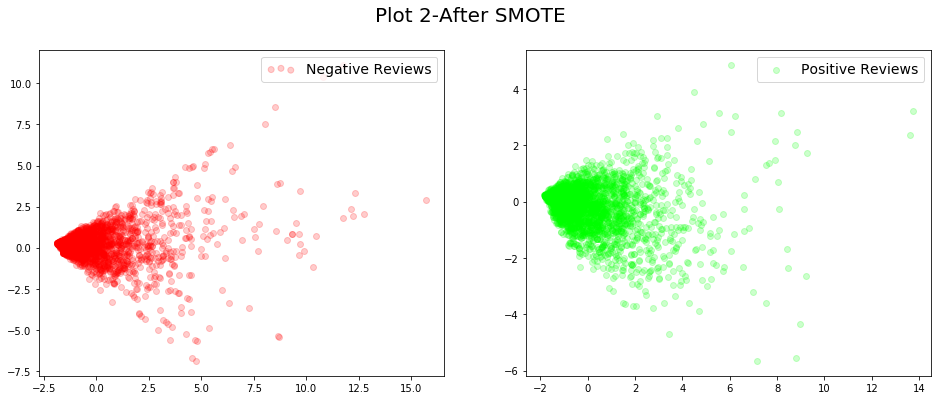

In [58]:
plt.figure(figsize=(16,6)).suptitle("Plot 1-Before SMOTE", fontsize=20)
plt.subplot(1,2,1).scatter((x_1)[:,0], (x_1)[:,1], color="red", alpha = 0.2)
plt.legend(('Negative Reviews',), scatterpoints =1,fontsize=14, loc = "upper right")
plt.subplot(1,2,2).scatter((x_5)[:,0], (x_5)[:,1], color="lime",alpha = 0.2)
plt.legend(('Positive Reviews',), scatterpoints =1,fontsize=14, loc = "upper right")

plt.figure(figsize=(16,6)).suptitle("Plot 2-After SMOTE", fontsize=20)
plt.subplot(1,2,1).scatter((x_1_res)[:,0], (x_1_res)[:,1], color="red",alpha = 0.2)
plt.legend(('Negative Reviews',), scatterpoints =3,fontsize=14, loc = "upper right")
plt.subplot(1,2,2).scatter((x_5_res)[:,0], (x_5_res)[:,1], color="lime",alpha = 0.2)
plt.legend(('Positive Reviews',), scatterpoints =1,fontsize=14, loc = "upper right")

# 18 Import Algorithms - Negative and positive reviews are balanced now and algorithms can be imported to train models.

In [59]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVC
from sklearn.ensemble import VotingClassifier

In [60]:
mnb = MultinomialNB()
bnb = BernoulliNB()
lr = LogisticRegression()
sgd = SGDClassifier()
sv = SVC()
lsv = LinearSVC()
nsv = NuSVC()
vot = VotingClassifier(estimators=[("mnb1", mnb),("lr2", lr), ("sgd3", sgd),("lsv4", lsv)],
                      weights = [1,2,1,1])

# 19. Fit the data – Models are trained on the balanced data set

In [61]:
mnbc = mnb.fit(x_resampled_train, y_resampled_train)
bnbc = bnb.fit(x_resampled_train, y_resampled_train)
lrr = lr.fit(x_resampled_train, y_resampled_train)
sgdc = sgd.fit(x_resampled_train, y_resampled_train)
svc = sv.fit(x_resampled_train, y_resampled_train)
lsvc = lsv.fit(x_resampled_train, y_resampled_train)
nsvc = nsv.fit(x_resampled_train, y_resampled_train)
vote = vot.fit(x_resampled_train, y_resampled_train)

C:\Users\maniq\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\maniq\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self),

In [62]:
print(x_train_dtm.shape)
print(x_resampled_train.shape)

(3268, 177744)
(5328, 177744)


In [63]:
print(y_train.shape)
print(y_resampled_train.shape)

(3268,)
(5328,)


In [64]:
print(y_train[y_train==1].count())
print(y_train[y_train==5].count())

604
2664


# 20. Matrices

In [65]:
print("MultinomialNB train score:", mnbc.score(x_resampled_train, y_resampled_train)*100)
print("Bernoulli train score:", bnbc.score(x_resampled_train, y_resampled_train)*100)
print("Logistic Regression train score:", lrr.score(x_resampled_train, y_resampled_train)*100)
print("SGDClassifier train score:", sgdc.score(x_resampled_train, y_resampled_train)*100)
print("SVC train score:", svc.score(x_resampled_train, y_resampled_train)*100)
print("LinearSVC train score:", lsvc.score(x_resampled_train, y_resampled_train)*100)
print("NuSVC train score:", nsvc.score(x_resampled_train, y_resampled_train)*100)
print("Voting train score:", vote.score(x_resampled_train, y_resampled_train)*100)

MultinomialNB train score: 99.90615615615616
Bernoulli train score: 96.69669669669669
Logistic Regression train score: 99.98123123123122
SGDClassifier train score: 99.98123123123122
SVC train score: 54.016516516516525
LinearSVC train score: 100.0
NuSVC train score: 95.57057057057057
Voting train score: 99.98123123123122


C:\Users\maniq\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Models are evaluated by comparing the predictions against the imbalanced dataset, testing the model on the imbalanced data set is a good way to determine how well the model would do in real life situation if the unknown data set is also imbalanced. 

In [66]:
print("MultinomialNB test score:", mnbc.score(x_test_dtm, y_test)*100)
print("Bernoulli test score:", bnbc.score(x_test_dtm, y_test)*100)
print("Logistic Regression test score:", lrr.score(x_test_dtm, y_test)*100)
print("SGDClassifier test score:", sgdc.score(x_test_dtm, y_test)*100)
print("SVC test score:", svc.score(x_test_dtm, y_test)*100)
print("LinearSVC test score:", lsvc.score(x_test_dtm, y_test)*100)
print("NuSVC test score:", nsvc.score(x_test_dtm, y_test)*100)
print("Voting test score:", vote.score(x_test_dtm, y_test)*100)

MultinomialNB test score: 93.15403422982885
Bernoulli test score: 88.14180929095355
Logistic Regression test score: 91.56479217603912
SGDClassifier test score: 91.44254278728606
SVC test score: 23.10513447432763
LinearSVC test score: 91.80929095354523
NuSVC test score: 84.84107579462102
Voting test score: 92.42053789731052


C:\Users\maniq\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# 21. Accuracy - Models are saved so these models can be used later to predict polarity of tweets

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
mnb_predict = mnbc.predict(x_test_dtm)
bnb_predict = bnbc.predict(x_test_dtm)
lr_predict = lrr.predict(x_test_dtm)
sgdc_predict = sgdc.predict(x_test_dtm)
svc_predict = svc.predict(x_test_dtm)
lsvc_predict = lsvc.predict(x_test_dtm)
nsvc_predict = nsvc.predict(x_test_dtm)
vote_predict = vote.predict(x_test_dtm)

C:\Users\maniq\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [69]:
print("MultinomialNB accuracy score:", accuracy_score(y_test, mnb_predict)*100)
print("Bernoulli accuracy score:", accuracy_score(y_test, bnb_predict)*100)
print("Logistic accuracy score:", accuracy_score(y_test, lr_predict)*100)
print("SGDClassifier accuracy score:", accuracy_score(y_test, sgdc_predict)*100)
print("SVC accuracy score:", accuracy_score(y_test, svc_predict)*100)
print("LinearSVC accuracy score:", accuracy_score(y_test, lsvc_predict)*100)
print("NuSVC accuracy score:", accuracy_score(y_test, nsvc_predict)*100)
print("Voting accuracy score:", accuracy_score(y_test, vote_predict)*100)

MultinomialNB accuracy score: 93.15403422982885
Bernoulli accuracy score: 88.14180929095355
Logistic accuracy score: 91.56479217603912
SGDClassifier accuracy score: 91.44254278728606
SVC accuracy score: 23.10513447432763
LinearSVC accuracy score: 91.80929095354523
NuSVC accuracy score: 84.84107579462102
Voting accuracy score: 92.42053789731052


# 22. Precission & Recall

In [70]:
from sklearn.metrics import precision_score, recall_score

In [71]:
print("MultinomialNB precision score:", precision_score(y_test, mnb_predict)*100)
print("MultinomialNB recall score:", recall_score(y_test, mnb_predict)*100)
print("\nBernoulli precision score:", precision_score(y_test, bnb_predict)*100)
print("Bernoulli recall score:", recall_score(y_test, bnb_predict)*100)
print("\nLogistic precision score:", precision_score(y_test, lr_predict)*100)
print("Logistic recall score:", recall_score(y_test, lr_predict)*100)
print("\nSGDClassifier precision score:", precision_score(y_test, sgdc_predict)*100)
print("SGDClassifier recall score:", recall_score(y_test, sgdc_predict)*100)
print("\nSVC precision score:", precision_score(y_test, svc_predict)*100)
print("SVC recall score:", recall_score(y_test, svc_predict)*100)
print("\nLinearSVC precision score:", precision_score(y_test, lsvc_predict)*100)
print("LinearSVC recall score:", recall_score(y_test, lsvc_predict)*100)
print("\nNuSVC precision score:", precision_score(y_test, nsvc_predict)*100)
print("NuSVC recall score:", recall_score(y_test, nsvc_predict)*100)
print("\nVoting precision score:", precision_score(y_test, vote_predict)*100)
print("Voting recall score:", recall_score(y_test, vote_predict)*100)

MultinomialNB precision score: 88.03418803418803
MultinomialNB recall score: 71.03448275862068

Bernoulli precision score: 94.44444444444444
Bernoulli recall score: 35.172413793103445

Logistic precision score: 78.35820895522389
Logistic recall score: 72.41379310344827

SGDClassifier precision score: 77.37226277372264
SGDClassifier recall score: 73.10344827586206

SVC precision score: 18.65284974093264
SVC recall score: 99.3103448275862

LinearSVC precision score: 84.82142857142857
LinearSVC recall score: 65.51724137931035

NuSVC precision score: 54.75113122171946
NuSVC recall score: 83.44827586206897

Voting precision score: 82.67716535433071
Voting recall score: 72.41379310344827


# 23. Classification report

In [72]:
from sklearn.metrics import classification_report

In [73]:
print("MultinomialNB\n",classification_report(y_test, mnb_predict)) 
print("------------------------------------------------------")
print("Bernoulli\n",classification_report(y_test, bnb_predict)) 
print("------------------------------------------------------")
print("Logistic\n",classification_report(y_test, lr_predict)) 
print("------------------------------------------------------")
print("SGDClassifier\n",classification_report(y_test, sgdc_predict)) 
print("------------------------------------------------------")
print("SVC\n",classification_report(y_test, svc_predict)) 
print("------------------------------------------------------")
print("LinearSVC\n",classification_report(y_test, lsvc_predict)) 
print("------------------------------------------------------")
print("NuSVC\n",classification_report(y_test, nsvc_predict)) 
print("------------------------------------------------------")
print("Voting\n",classification_report(y_test, vote_predict)) 

MultinomialNB
              precision    recall  f1-score   support

          1       0.88      0.71      0.79       145
          5       0.94      0.98      0.96       673

avg / total       0.93      0.93      0.93       818

------------------------------------------------------
Bernoulli
              precision    recall  f1-score   support

          1       0.94      0.35      0.51       145
          5       0.88      1.00      0.93       673

avg / total       0.89      0.88      0.86       818

------------------------------------------------------
Logistic
              precision    recall  f1-score   support

          1       0.78      0.72      0.75       145
          5       0.94      0.96      0.95       673

avg / total       0.91      0.92      0.91       818

------------------------------------------------------
SGDClassifier
              precision    recall  f1-score   support

          1       0.77      0.73      0.75       145
          5       0.94      0.95

# In order to determine how well the model will do on unknown dataset, and exactly how precise and accurate the models are, precision, recall, and f1 scores are calculated using classification report. It is easy for models to detect positive reviews because the testing dataset was left imbalanced and has high representation of positive reviews, which is why scores for minority class, negative reviews are evaluated. Multinomial Naïve Bayes did well on correctly classifying negative tweets by getting an f1-score of 0.79, which is the highest. Voting classifier produced an f1-score of 0.77. Logistic Regression, Gradient Descent, and Linear Support Vector Machines Classifier produced an f1-score of 0.74.

In [74]:
#checkpoint

# 24. Test the model on tweets

In [75]:
new_data.head()

,text
0,2 months ago Kathy Griffin was a pariah but no...
1,@SenWarren @realDonaldTrump They are the barba...
2,"If we had any balls, and weren't scared to dea..."
3,Manaforts daughter’s comments \n#maga #mueller...
4,@GOP Trump is playing all of you for weak spin...


In [76]:
new_data.text[0]

'2 months ago Kathy Griffin was a pariah but now she’s harassing Kevin Hart for not trashing Trump in his shows. Did I miss something that has elevated her to some kind of champion of the left (I.e., bully).'

# Tweet text is assigned to x. 

In [77]:
x = new_data.text

# # Stop words are removed from tweets, just like stopwords were removed from yelp reviews because stopwords or common words don’t play much role in polarity (positivity or negativity of the language). Removing these stop words helps save resources.

In [78]:
x = list(map(lambda a: a.lower().split(), x)) # change all uppercase words or titles to lower cases and split them at space
stop_words = set(stopwords.words('english'))  # find all stop words and make them equal to stop_words
x = list(map(lambda a: [item for item in a if item not in stop_words], x)) # only save words that are not stopwords
x = list(map(lambda a: " ".join(a), x)) # join back all the words that were seperated by commas

# 25. Count Vectorizer takes the text of the tweet and turns them into numbers, so machine learning algorithms that were trained on yelp reviews can predict if the tweet is positive or negative.

In [79]:
#x_dtm = vect.fit_transform(x) # why not fit_transform? Dimension mismatch
x_dtm = vect.transform(x) # Originally

In [80]:
x_dtm

<209x177744 sparse matrix of type '<class 'numpy.int64'>'
	with 3209 stored elements in Compressed Sparse Row format>

# 26. TF-IDF is also skipped for tweets because common words were removed using stopwords from nltk corpus.

In [81]:
#tfidf_transformer = TfidfTransformer()
#x_train_tfidf = tfidf_transformer.fit_transform(x_train_dtm)
#x_test_tfidf =  tfidf_transformer.transform(x_test_dtm)

In [82]:
#x = tfidf_transformer.fit_transform(x)
#x_new = tfidf_transformer.transform(x)

# 27. Positive and negative tweets

In [83]:
#print(nbr.predict(x[60]))
#print(lrr.predict(x[60]))

In [84]:
#mnbc_prediction[2]

In [85]:
mnbc_prediction = mnbc.predict(x_dtm)
lrr_prediction = lrr.predict(x_dtm)
sgdc_prediction = sgdc.predict(x_dtm)
lsvc_prediction = lsvc.predict(x_dtm)
nsvc_prediction = nsvc.predict(x_dtm)
vote_prediction = vote.predict(x_dtm)

C:\Users\maniq\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Tweets are calculated in percentage (100 being the highest possible) for both positive and negative tweets. Each model predicts how many positive tweets and negative tweets are there. Using as many good models as possible is a good way to examine which models mostly predict the tweet as negative or positive.

In [86]:
print("Mutlinomial negative tweets:",len(mnbc_prediction[mnbc_prediction==1])/len(mnbc_prediction)*100)
print("Multinomial positive tweets:",len(mnbc_prediction[mnbc_prediction==5])/len(mnbc_prediction)*100)
print("\nLogistic negative tweets:",len(lrr_prediction[lrr_prediction==1])/len(lrr_prediction)*100)
print("Logistic positive tweets:",len(lrr_prediction[lrr_prediction==5])/len(lrr_prediction)*100)
print("\nSGDC negative tweets:",len(sgdc_prediction[sgdc_prediction==1])/len(sgdc_prediction)*100)
print("SGDC positive tweets:",len(sgdc_prediction[sgdc_prediction==5])/len(sgdc_prediction)*100)
print("\nLinearSVC negative tweets:",len(lsvc_prediction[lsvc_prediction==1])/len(lsvc_prediction)*100)
print("LinearSVC positive tweets:",len(lsvc_prediction[lsvc_prediction==5])/len(lsvc_prediction)*100)
print("\nNuSVC negative tweets:",len(nsvc_prediction[nsvc_prediction==1])/len(nsvc_prediction)*100)
print("NuSVC positive tweets:",len(nsvc_prediction[nsvc_prediction==5])/len(nsvc_prediction)*100)
print("\nVoting negative tweets:",len(vote_prediction[vote_prediction==1])/len(vote_prediction)*100)
print("Voting positive tweets:",len(vote_prediction[vote_prediction==5])/len(vote_prediction)*100)

Mutlinomial negative tweets: 58.3732057416268
Multinomial positive tweets: 41.62679425837321

Logistic negative tweets: 58.85167464114832
Logistic positive tweets: 41.14832535885167

SGDC negative tweets: 64.5933014354067
SGDC positive tweets: 35.406698564593306

LinearSVC negative tweets: 18.181818181818183
LinearSVC positive tweets: 81.81818181818183

NuSVC negative tweets: 97.1291866028708
NuSVC positive tweets: 2.8708133971291865

Voting negative tweets: 54.066985645933016
Voting positive tweets: 45.933014354066984


In [87]:
(mnbc_prediction==5).sum()

87

In [88]:
len(mnbc_prediction)

209

# Based on the above results for all of the models: Multinomial Naïve Bayes, Logistic Regression, and Gradient Descent predict 50% to 58% tweets are negative and 41% to 48% tweets are positive. Linear Support Vector Machine Classifier predicts 18% tweets are negative and 81% tweets are positive. Voting classifier predicts 65% tweets are negative and 34% tweets are positive.

# Sentiment Analysis - TextBlob is also used to examine the polarity of tweets.  

In [89]:
from textblob import TextBlob

In [90]:
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Polarity of the tweet is detected using TextBlob and then the polarity is saved on the DataFrame next to the tweet. 

In [91]:
new_data['new_polarity'] = new_data.text.apply(detect_sentiment)

C:\Users\maniq\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [92]:
new_data.head()

,text,new_polarity
0,2 months ago Kathy Griffin was a pariah but no...,0.300000
1,@SenWarren @realDonaldTrump They are the barba...,0.300000
2,"If we had any balls, and weren't scared to dea...",-0.333333
3,Manaforts daughter’s comments \n#maga #mueller...,0.000000
4,@GOP Trump is playing all of you for weak spin...,-0.265278


In [93]:
new_data.new_polarity[new_data.new_polarity >0].count()

84

In [94]:
new_data.new_polarity[new_data.new_polarity < 0].count()

88

# In order to evaluate tweets and determine the relaiabaility of TextBlob sentiment and machine learning models, tweets are read and then labelled +1 for positive and -1 for negative

In [95]:
print("00",new_data.text[0])        # 
print("\n01",new_data.text[1])      # 
print("\n02",new_data.text[2])      # 
print("\n03",new_data.text[3])      # 
print("\n04",new_data.text[4])      # 
print("\n05",new_data.text[5])      # 
print("\n06",new_data.text[6])      # 
print("\n07",new_data.text[7])      # 
print("\n08",new_data.text[8])      # 
print("\n09",new_data.text[9])      # 
print("\n10",new_data.text[10])     # 
print("\n11",new_data.text[11])     # 
print("\n12",new_data.text[12])     # 
print("\n13",new_data.text[13])     # 
print("\n14",new_data.text[14])     # 
print("\n15",new_data.text[15])     # 
print("\n16",new_data.text[16])     # 
print("\n17",new_data.text[17])     # 
print("\n18",new_data.text[18])     # 
print("\n19",new_data.text[19])     # 


00 2 months ago Kathy Griffin was a pariah but now she’s harassing Kevin Hart for not trashing Trump in his shows. Did I miss something that has elevated her to some kind of champion of the left (I.e., bully).

01 @SenWarren @realDonaldTrump They are the barbaric ones for exposing their children to this. This many people aren't fleeing domestic abuse. We can't let them break our laws. This is the best way to enforce them. At least we are taking care of them.

02 If we had any balls, and weren't scared to death of missing a few days work
Maybe We'd Be In The Fucking Streets
Demanding the Release of
 11,000 Children https://t.co/JtaUK0818L

03 Manaforts daughter’s comments 
#maga #mueller #robertmueller #trumptrain #republican #congress #usa #nflboycott #trump #donaldtrump #potus #whitehouse https://t.co/Br6lVSAaIa

04 @GOP Trump is playing all of you for weak spineless fools. Stand up to him or cower and allow our country to suffer and go down  in history as traitors. https://t.co/VPnq0

# My criteria to label a tweet positive or negative was to consider how I would or anyone would talk to a child. And people usually refrain from using negative words so children will not pick up any negative and words and profanity. Hence, even mention of a single negative word in a tweet was labelled as negative. Tweets were labelled as positive or negative based on the tone of words and not my personal political standing and viewpoint. 

# After reading twenty tweets, 16 tweets were labelled negative and 4 tweets were labelled positive, which is 80% negative and 20% positive. In a different twitter stream on the same topic of Donald Trump, I read 60 tweets and over 40 of them were negative and 20 were positive. That brings it close to Voting classifier which labels 65% tweets as negative and 34% tweets as positive and this model also performed well on the yelp reviews, which has an f1-score of 0.77 for minority class. 

# As hypothesized in the beginning of the project that most tweets will be negative and after running the models and actually reading the tweets, most tweets are negative. People also tweeted about North Korea and separation of families, which led to positive as well as negative polarity. 

# The best way to label tweets as positive or negative is to actually read the tweet and then label them, but it is even effective to have a small team of people read tweets and then cast a vote on each tweet. Because one person could have more stern criteria or bias on a topic and the other person could have a more balanced approach and having more people vote on tweets will help get a better idea of how people in general feel and think about a tweet and categorize it as negative or positive. 

# One area to explore would be to stream tweets with mixed positive and negative words and then predict the tweets using machine learning models and TextBlob  to assess which different models predict more positive or negative tweets. 

# It is understandable that more tweets are negative because it's a controversial topic and it might even help to choose a different topic that is not political. 

# Even when tweets are read, it is hard sometimes to label something as positive and negative because the tweets are simply neutral and polarity cannot be observed as simply black and white. One idea can be incorporated from TextBlob which is to have different levels of polarity. Possibly 5 levels or categories, which would allow 2 positive and 2 negative polarity levels with one neutral level. Doing sentiment analysis can tell what the general outlook about a topic is, but sentiment would have to be cross referenced, possibly by reading some actual tweets or creating some other method, to determine and validate how much polarity a topic has. 